In [815]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [816]:
'''
INTRODUCTION: 
In the domain of sports analytics, predicting the outcomes of football matches is a challenging yet valuable task. It enables clubs to anticipate game results, assists bettors in decision-making, and enriches fan experiences. This report details the development of  machine learning model designed to predict the results of Premier League football matches offering insights into team performance and match dynamics 

METHODOLOGY:
Our dataset comprises match statistics from the Premier League spanning from 2000 to 2022 seasons. We performed some data cleaning, handled missing values and encoded categorical variables. We engineered features like team point differences and goal statistics. We Evaluated logistic regression, Random Forest, Gradient Boosting models, optimizing Hyperparameter using Grid Search


RESULTS: 
The Gradient Boosting Model achieve the highest accuracy of 64.47% on the testing set. with a precision of 
'''

'\nINTRODUCTION: \nIn the domain of sports analytics, predicting the outcomes of football matches is a challenging yet valuable task. It enables clubs to anticipate game results, assists bettors in decision-making, and enriches fan experiences. This report details the development of  machine learning model designed to predict the results of Premier League football matches offering insights into team performance and match dynamics \n\nMETHODOLOGY:\nOur dataset comprises match statistics from the Premier League spanning from 2000 to 2022 seasons. We performed some data cleaning, handled missing values and encoded categorical variables. We engineered features like team point differences and goal statistics. We Evaluated logistic regression, Random Forest, Gradient Boosting models, optimizing Hyperparameter using Grid Search\n\n\nRESULTS: \nThe Gradient Boosting Model achieve the highest accuracy of 64.47% on the testing set. with a precision of \n'

In [817]:
matches = pd.read_csv("matches.csv", index_col=0)

In [818]:
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,,,,,,,,,,,,,,,,,,,,,
1,2021-08-15,16:30,Premier League,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,...,Match Report,NaN,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City
2,2021-08-21,15:00,Premier League,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,...,Match Report,NaN,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City
3,2021-08-28,12:30,Premier League,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,...,Match Report,NaN,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City
4,2021-09-11,15:00,Premier League,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,...,Match Report,NaN,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City
6,2021-09-18,15:00,Premier League,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,...,Match Report,NaN,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City


In [819]:
matches.shape

(1389, 27)

In [820]:
# 2 seasons * 20 squads * 38 matches
2 * 20 * 38

1520

In [821]:
# Missing Liverpool 2021-2022
matches["team"].value_counts()
#3 teams get relegated every year 
#3 teams get promoted every year into premier league              

Southampton                 72
Brighton and Hove Albion    72
Manchester United           72
West Ham United             72
Newcastle United            72
Burnley                     71
Leeds United                71
Crystal Palace              71
Manchester City             71
Wolverhampton Wanderers     71
Tottenham Hotspur           71
Arsenal                     71
Leicester City              70
Chelsea                     70
Aston Villa                 70
Everton                     70
Liverpool                   38
Fulham                      38
West Bromwich Albion        38
Sheffield United            38
Brentford                   34
Watford                     33
Norwich City                33
Name: team, dtype: int64

In [822]:
# Realized there is a mission season for liverpool 
matches[matches["team"] == "Liverpool"].sort_values("date")

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
1,,,,,,,,,,,,,,,,,,,,,
1,2020-09-12,17:30,Premier League,Matchweek 1,Sat,Home,W,4.0,3.0,Leeds United,...,Match Report,NaN,20.0,4.0,17.0,0.0,2.0,2.0,2021,Liverpool
2,2020-09-20,16:30,Premier League,Matchweek 2,Sun,Away,W,2.0,0.0,Chelsea,...,Match Report,NaN,17.0,5.0,17.7,1.0,0.0,0.0,2021,Liverpool
4,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Home,W,3.0,1.0,Arsenal,...,Match Report,NaN,21.0,9.0,16.8,0.0,0.0,0.0,2021,Liverpool
6,2020-10-04,19:15,Premier League,Matchweek 4,Sun,Away,L,2.0,7.0,Aston Villa,...,Match Report,NaN,14.0,8.0,15.8,1.0,0.0,0.0,2021,Liverpool
7,2020-10-17,12:30,Premier League,Matchweek 5,Sat,Away,D,2.0,2.0,Everton,...,Match Report,NaN,22.0,8.0,15.0,1.0,0.0,0.0,2021,Liverpool
9,2020-10-24,20:00,Premier League,Matchweek 6,Sat,Home,W,2.0,1.0,Sheffield Utd,...,Match Report,NaN,17.0,5.0,18.2,1.0,0.0,0.0,2021,Liverpool
11,2020-10-31,17:30,Premier League,Matchweek 7,Sat,Home,W,2.0,1.0,West Ham,...,Match Report,NaN,8.0,2.0,18.6,1.0,1.0,1.0,2021,Liverpool
13,2020-11-08,16:30,Premier League,Matchweek 8,Sun,Away,D,1.0,1.0,Manchester City,...,Match Report,NaN,9.0,2.0,21.5,0.0,1.0,1.0,2021,Liverpool
14,2020-11-22,19:15,Premier League,Matchweek 9,Sun,Home,W,3.0,0.0,Leicester City,...,Match Report,NaN,24.0,12.0,11.9,0.0,0.0,0.0,2021,Liverpool


In [823]:
matches["round"].value_counts()

Matchweek 1     39
Matchweek 16    39
Matchweek 34    39
Matchweek 32    39
Matchweek 31    39
Matchweek 29    39
Matchweek 28    39
Matchweek 26    39
Matchweek 25    39
Matchweek 24    39
Matchweek 23    39
Matchweek 2     39
Matchweek 19    39
Matchweek 17    39
Matchweek 20    39
Matchweek 15    39
Matchweek 5     39
Matchweek 3     39
Matchweek 13    39
Matchweek 12    39
Matchweek 4     39
Matchweek 11    39
Matchweek 10    39
Matchweek 9     39
Matchweek 8     39
Matchweek 14    39
Matchweek 7     39
Matchweek 6     39
Matchweek 30    37
Matchweek 27    37
Matchweek 22    37
Matchweek 21    37
Matchweek 18    37
Matchweek 33    32
Matchweek 35    20
Matchweek 36    20
Matchweek 37    20
Matchweek 38    20
Name: round, dtype: int64

In [824]:
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk              float64
pkatt           float64
season            int64
team             object
dtype: object

In [825]:
# Cleaning column "comp"
del matches["comp"]

In [826]:
#Cleaning column "notes"
del matches["notes"]

In [827]:
# Converting date to data type in panda. 
matches["date"] = pd.to_datetime(matches["date"])

In [828]:
# if result = true = winning if not lost or draw 
matches["target"] = (matches["result"] == "W").astype("int")

In [829]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,match report,sh,sot,dist,fk,pk,pkatt,season,team,target
1,,,,,,,,,,,,,,,,,,,,,
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,Match Report,18.0,4.0,16.9,1.0,0.0,0.0,2022,Manchester City,0
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,Match Report,16.0,4.0,17.3,1.0,0.0,0.0,2022,Manchester City,1
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,Match Report,25.0,10.0,14.3,0.0,0.0,0.0,2022,Manchester City,1
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,Match Report,25.0,8.0,14.0,0.0,0.0,0.0,2022,Manchester City,1
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,Match Report,16.0,1.0,15.7,1.0,0.0,0.0,2022,Manchester City,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,Match Report,8.0,1.0,17.4,0.0,0.0,0.0,2021,Sheffield United,0
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,Match Report,7.0,0.0,11.4,1.0,0.0,0.0,2021,Sheffield United,0
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,Match Report,10.0,3.0,17.0,0.0,0.0,0.0,2021,Sheffield United,1


In [830]:
# Predictor converting Home/ Away into a numeric column 0=Home 1=Away 
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [831]:
# Unique code for each opponent team
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [832]:
# Maybe some time plays at better time of the day
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [833]:
# Day code for each day of the week 
matches["day_code"] = matches["date"].dt.dayofweek

In [834]:
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,fk,pk,pkatt,season,team,target,venue_code,opp_code,hour,day_code
1,,,,,,,,,,,,,,,,,,,,,
1,2021-08-15,16:30,Matchweek 1,Sun,Away,L,0.0,1.0,Tottenham,1.9,...,1.0,0.0,0.0,2022,Manchester City,0,0,18,16,6
2,2021-08-21,15:00,Matchweek 2,Sat,Home,W,5.0,0.0,Norwich City,2.7,...,1.0,0.0,0.0,2022,Manchester City,1,1,15,15,5
3,2021-08-28,12:30,Matchweek 3,Sat,Home,W,5.0,0.0,Arsenal,3.8,...,0.0,0.0,0.0,2022,Manchester City,1,1,0,12,5
4,2021-09-11,15:00,Matchweek 4,Sat,Away,W,1.0,0.0,Leicester City,2.9,...,0.0,0.0,0.0,2022,Manchester City,1,0,10,15,5
6,2021-09-18,15:00,Matchweek 5,Sat,Home,D,0.0,0.0,Southampton,1.1,...,1.0,0.0,0.0,2022,Manchester City,0,1,17,15,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,2021-05-02,19:15,Matchweek 34,Sun,Away,L,0.0,4.0,Tottenham,0.5,...,0.0,0.0,0.0,2021,Sheffield United,0,0,18,19,6
39,2021-05-08,15:00,Matchweek 35,Sat,Home,L,0.0,2.0,Crystal Palace,0.7,...,1.0,0.0,0.0,2021,Sheffield United,0,1,6,15,5
40,2021-05-16,19:00,Matchweek 36,Sun,Away,W,1.0,0.0,Everton,1.6,...,0.0,0.0,0.0,2021,Sheffield United,1,0,7,19,6


In [835]:
#Import randomforest classifier 
# picking up non linear data in the code. 
from sklearn.ensemble import RandomForestClassifier

In [836]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)

In [837]:
# Making sure that all the test data come after the data of the training data
# taking all the matches before 2022
train = matches[matches["date"] < '2022-01-01']

In [838]:
# Anything in 2022
test = matches[matches["date"] > '2022-01-01']

In [839]:
# List of features columns we created.
predictors = ["venue_code", "opp_code", "hour", "day_code"]

In [840]:
rf.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [841]:
preds = rf.predict(test[predictors])

In [842]:
from sklearn.metrics import accuracy_score

In [843]:
# Determine the accuracy of the model. 
error = accuracy_score(test["target"], preds)

In [844]:
error

0.6123188405797102

In [845]:
# Combine our actual values vs predicted value 
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))

In [846]:
# Create when we predicted a 0 and a 1 and what actually happened.
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,141,31
1,76,28


In [847]:
from sklearn.metrics import precision_score
# WHen we predicted a win what percentage of time did the team actually win 
precision_score(test["target"], preds)

0.4745762711864407

In [848]:
# Create one dataframe for every team 
grouped_matches = matches.groupby("team")

In [849]:
group = grouped_matches.get_group("Manchester City").sort_values("date")

In [850]:
# Take a group in, it will take a set of columns to compute the rolling average and take a new set of new columns to assign rolling averages 
def rolling_averages(group, cols, new_cols):
    # Sort it in order of date
    group = group.sort_values("date")
    # take a set of columns and computing the rolling averages  closed="left"
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols] = rolling_stats
    # Dropping any missing values 
    group = group.dropna(subset=new_cols)
    return group

In [851]:
# Columns we want to computer rolling average
# gf = goals for, ga= goal against, sh = shots taken, sot = shots on target, dist = distance shot travel, fk = freekick, pk = penalty kicks, pkatt= penalty kicks attends
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

rolling_averages(group, cols, new_cols)

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
1,,,,,,,,,,,,,,,,,,,,,
5,2020-10-17,17:30,Matchweek 5,Sat,Home,W,1.0,0.0,Arsenal,1.5,...,17,5,2.000000,2.333333,17.333333,4.666667,18.900000,1.333333,0.333333,0.333333
7,2020-10-24,12:30,Matchweek 6,Sat,Away,D,1.0,1.0,West Ham,1.1,...,12,5,1.333333,2.000000,17.333333,3.666667,17.733333,0.666667,0.000000,0.000000
9,2020-10-31,12:30,Matchweek 7,Sat,Away,W,1.0,0.0,Sheffield Utd,1.5,...,12,5,1.000000,0.666667,16.666667,4.333333,18.233333,0.666667,0.000000,0.000000
11,2020-11-08,16:30,Matchweek 8,Sun,Home,D,1.0,1.0,Liverpool,1.6,...,16,6,1.000000,0.333333,14.333333,6.666667,18.466667,1.000000,0.000000,0.000000
12,2020-11-21,17:30,Matchweek 9,Sat,Away,L,0.0,2.0,Tottenham,1.3,...,17,5,1.000000,0.666667,12.000000,5.666667,19.366667,1.000000,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,2022-03-14,20:00,Matchweek 29,Mon,Away,D,0.0,0.0,Crystal Palace,2.3,...,20,0,2.333333,1.333333,19.000000,7.000000,15.366667,0.333333,0.333333,0.333333
44,2022-04-02,15:00,Matchweek 31,Sat,Away,W,2.0,0.0,Burnley,1.8,...,15,5,1.666667,0.333333,18.333333,7.333333,16.000000,0.333333,0.000000,0.000000
46,2022-04-10,16:30,Matchweek 32,Sun,Home,D,2.0,2.0,Liverpool,2.0,...,16,6,2.000000,0.333333,20.000000,6.666667,16.133333,0.333333,0.000000,0.000000


In [852]:
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

In [853]:
matches_rolling

date   time         round  day venue result  \
team                    1                                                      
Arsenal                 6  2020-10-04  14:00   Matchweek 4  Sun  Home      W   
                        7  2020-10-17  17:30   Matchweek 5  Sat  Away      L   
                        9  2020-10-25  19:15   Matchweek 6  Sun  Home      L   
                        11 2020-11-01  16:30   Matchweek 7  Sun  Away      W   
                        13 2020-11-08  19:15   Matchweek 8  Sun  Home      L   
...                               ...    ...           ...  ...   ...    ...   
Wolverhampton Wanderers 32 2022-03-13  14:00  Matchweek 29  Sun  Away      W   
                        33 2022-03-18  20:00  Matchweek 30  Fri  Home      L   
                        34 2022-04-02  15:00  Matchweek 31  Sat  Home      W   
                        35 2022-04-08  20:00  Matchweek 32  Fri  Away      L   
                        36 2022-04-24  14:00  Matchweek 34  Sun  Away      L   

                             gf   ga         opponent   xg  ...  hour  \
team                    1                                   ...         
Arsenal                 6   2.0  1.0    Sheffield Utd  0.4  ...    14   
                        7   0.0  1.0  Manchester City  0.9  ...    17   
                        9   0.0  1.0   Leicester City  0.9  ...    19   
                        11  1.0  0.0   Manchester Utd  1.1  ...    16   
                        13  0.0  3.0      Aston Villa  1.5  ...    19   
...                         ...  ...              ...  ...  ...   ...   
Wolverhampton Wanderers 32  1.0  0.0          Everton  0.8  ...    14   
                        33  2.0  3.0     Leeds United  0.8  ...    20   
                        34  2.0  1.0      Aston Villa  1.2  ...    15   
                        35  0.0  1.0    Newcastle Utd  0.3  ...    20   
                        36  0.0  1.0          Burnley  0.7  ...    14   

                            day_code  gf_rolling ga_rolling sh_rolling  \
team                    1                                                
Arsenal                 6          6    2.000000   1.333333   7.666667   
                        7          5    1.666667   1.666667   5.333333   
                        9          6    1.000000   1.666667   7.000000   
                        11         6    0.666667   1.000000   9.666667   
                        13         6    0.333333   0.666667   9.666667   
...                              ...         ...        ...        ...   
Wolverhampton Wanderers 32         6    1.333333   1.000000  12.333333   
                        33         4    1.666667   0.666667  12.333333   
                        34         5    2.333333   1.000000  13.000000   
                        35         4    1.666667   1.333333  13.000000   
                        36         6    1.333333   1.666667  10.000000   

                           sot_rolling dist_rolling  fk_rolling  pk_rolling  \
team                    1                                                     
Arsenal                 6     3.666667    14.733333    0.666667    0.000000   
                        7     3.666667    15.766667    0.000000    0.000000   
                        9     3.666667    16.733333    0.666667    0.000000   
                        11    4.000000    16.033333    1.000000    0.000000   
                        13    2.666667    18.033333    1.000000    0.333333   
...                                ...          ...         ...         ...   
Wolverhampton Wanderers 32    3.666667    19.300000    0.000000    0.000000   
                        33    4.333333    19.600000    0.000000    0.000000   
                        34    5.333333    19.833333    0.000000    0.000000   
                        35    5.000000    18.533333    0.000000    0.000000   
                        36    4.666667    17.633333    0.000000    0.000000   

                            pkatt_rolling  
team   

In [854]:
matches_rolling = matches_rolling.droplevel('team')

In [855]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,hour,day_code,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
1,,,,,,,,,,,,,,,,,,,,,
6,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.4,...,14,6,2.000000,1.333333,7.666667,3.666667,14.733333,0.666667,0.000000,0.000000
7,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,...,17,5,1.666667,1.666667,5.333333,3.666667,15.766667,0.000000,0.000000,0.000000
9,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.9,...,19,6,1.000000,1.666667,7.000000,3.666667,16.733333,0.666667,0.000000,0.000000
11,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.1,...,16,6,0.666667,1.000000,9.666667,4.000000,16.033333,1.000000,0.000000,0.000000
13,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,...,19,6,0.333333,0.666667,9.666667,2.666667,18.033333,1.000000,0.333333,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,2022-03-13,14:00,Matchweek 29,Sun,Away,W,1.0,0.0,Everton,0.8,...,14,6,1.333333,1.000000,12.333333,3.666667,19.300000,0.000000,0.000000,0.000000
33,2022-03-18,20:00,Matchweek 30,Fri,Home,L,2.0,3.0,Leeds United,0.8,...,20,4,1.666667,0.666667,12.333333,4.333333,19.600000,0.000000,0.000000,0.000000
34,2022-04-02,15:00,Matchweek 31,Sat,Home,W,2.0,1.0,Aston Villa,1.2,...,15,5,2.333333,1.000000,13.000000,5.333333,19.833333,0.000000,0.000000,0.000000


In [856]:
# assign value from 0 to 1316 to get unique values for each index. 
matches_rolling.index = range(matches_rolling.shape[0])

In [857]:
# Applying changes for better accuracy score
def make_predictions(data, predictors):
    train = data[data["date"] < '2022-01-01']
    test = data[data["date"] > '2022-01-01']
    rf.fit(train[predictors], train["target"])
    preds = rf.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    error = precision_score(test["target"], preds)
    return combined, error

In [858]:
combined, error = make_predictions(matches_rolling, predictors + new_cols)

In [859]:
# 47 to 62
error

0.625

In [860]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [861]:
combined.head(10)

,actual,predicted,date,team,opponent,result
55,0,0,2022-01-23,Arsenal,Burnley,D
56,1,0,2022-02-10,Arsenal,Wolves,W
57,1,0,2022-02-19,Arsenal,Brentford,W
58,1,1,2022-02-24,Arsenal,Wolves,W
59,1,1,2022-03-06,Arsenal,Watford,W
60,1,1,2022-03-13,Arsenal,Leicester City,W
61,0,1,2022-03-16,Arsenal,Liverpool,L
62,1,0,2022-03-19,Arsenal,Aston Villa,W
63,0,0,2022-04-04,Arsenal,Crystal Palace,L
64,0,0,2022-04-09,Arsenal,Brighton,L


In [862]:
class MissingDict(dict):
    # Create a class that inherit from the dict class 
    # panda will not handle any missing keys, it will just remove missing name. and replace it with the value below.  
    __missing__ = lambda self, key: key

map_values = {"Brighton and Hove Albion": "Brighton", 
              "Manchester United": "Manchester Utd", 
              "Newcastle United": "Newcastle Utd", 
              "Tottenham Hotspur": "Tottenham", 
              "West Ham United": "West Ham", 
              "Wolverhampton Wanderers": "Wolves"
              } 
mapping = MissingDict(**map_values)

In [863]:
combined["new_team"] = combined["team"].map(mapping)

In [864]:
merged = combined.merge(combined, left_on=["date", "new_team"], right_on=["date", "opponent"])

In [865]:
merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,new_team_x,actual_y,predicted_y,team_y,opponent_y,result_y,new_team_y
0,0,0,2022-01-23,Arsenal,Burnley,D,Arsenal,0,0,Burnley,Arsenal,D,Burnley
1,1,0,2022-02-10,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
2,1,0,2022-02-19,Arsenal,Brentford,W,Arsenal,0,0,Brentford,Arsenal,L,Brentford
3,1,1,2022-02-24,Arsenal,Wolves,W,Arsenal,0,0,Wolverhampton Wanderers,Arsenal,L,Wolves
4,1,1,2022-03-06,Arsenal,Watford,W,Arsenal,0,0,Watford,Arsenal,L,Watford
...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,1,0,2022-03-13,Wolverhampton Wanderers,Everton,W,Wolves,0,0,Everton,Wolves,L,Everton
258,0,0,2022-03-18,Wolverhampton Wanderers,Leeds United,L,Wolves,1,0,Leeds United,Wolves,W,Leeds United
259,1,0,2022-04-02,Wolverhampton Wanderers,Aston Villa,W,Wolves,0,0,Aston Villa,Wolves,L,Aston Villa
260,0,0,2022-04-08,Wolverhampton Wanderers,Newcastle Utd,L,Wolves,1,0,Newcastle United,Wolves,W,Newcastle Utd


In [866]:
# Team one was predicted to win 
# Team 2 was predicted to lose 
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] ==0)]["actual_x"].value_counts()

1    27
0    13
Name: actual_x, dtype: int64

In [868]:
# Importing a richer data set with 22 season 2000-2022
new_data_set = pd.read_csv("final_dataset.csv")

In [869]:
print(f"Number of rows: {new_data_set.shape[0]}")
print(f"Number of cols: {new_data_set.shape[1]}")

Number of rows: 6840
Number of cols: 40


In [870]:
summary_statistics = new_data_set.describe()

In [871]:
missing_values = new_data_set.isnull().sum()

In [872]:
new_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6840 entries, 0 to 6839
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6840 non-null   int64  
 1   Date           6840 non-null   object 
 2   HomeTeam       6840 non-null   object 
 3   AwayTeam       6840 non-null   object 
 4   FTHG           6840 non-null   int64  
 5   FTAG           6840 non-null   int64  
 6   FTR            6840 non-null   object 
 7   HTGS           6840 non-null   int64  
 8   ATGS           6840 non-null   int64  
 9   HTGC           6840 non-null   int64  
 10  ATGC           6840 non-null   int64  
 11  HTP            6840 non-null   float64
 12  ATP            6840 non-null   float64
 13  HM1            6840 non-null   object 
 14  HM2            6840 non-null   object 
 15  HM3            6840 non-null   object 
 16  HM4            6840 non-null   object 
 17  HM5            6840 non-null   object 
 18  AM1     

In [873]:
new_data_set.isnull().sum()

Unnamed: 0       0
Date             0
HomeTeam         0
AwayTeam         0
FTHG             0
FTAG             0
FTR              0
HTGS             0
ATGS             0
HTGC             0
ATGC             0
HTP              0
ATP              0
HM1              0
HM2              0
HM3              0
HM4              0
HM5              0
AM1              0
AM2              0
AM3              0
AM4              0
AM5              0
MW               0
HTFormPtsStr     0
ATFormPtsStr     0
HTFormPts        0
ATFormPts        0
HTWinStreak3     0
HTWinStreak5     0
HTLossStreak3    0
HTLossStreak5    0
ATWinStreak3     0
ATWinStreak5     0
ATLossStreak3    0
ATLossStreak5    0
HTGD             0
ATGD             0
DiffPts          0
DiffFormPts      0
dtype: int64

In [874]:
# Check for duplicates 
new_data_set.duplicated().sum()

0

In [875]:
# Dro rows with missing values 
new_data_set = new_data_set.dropna()

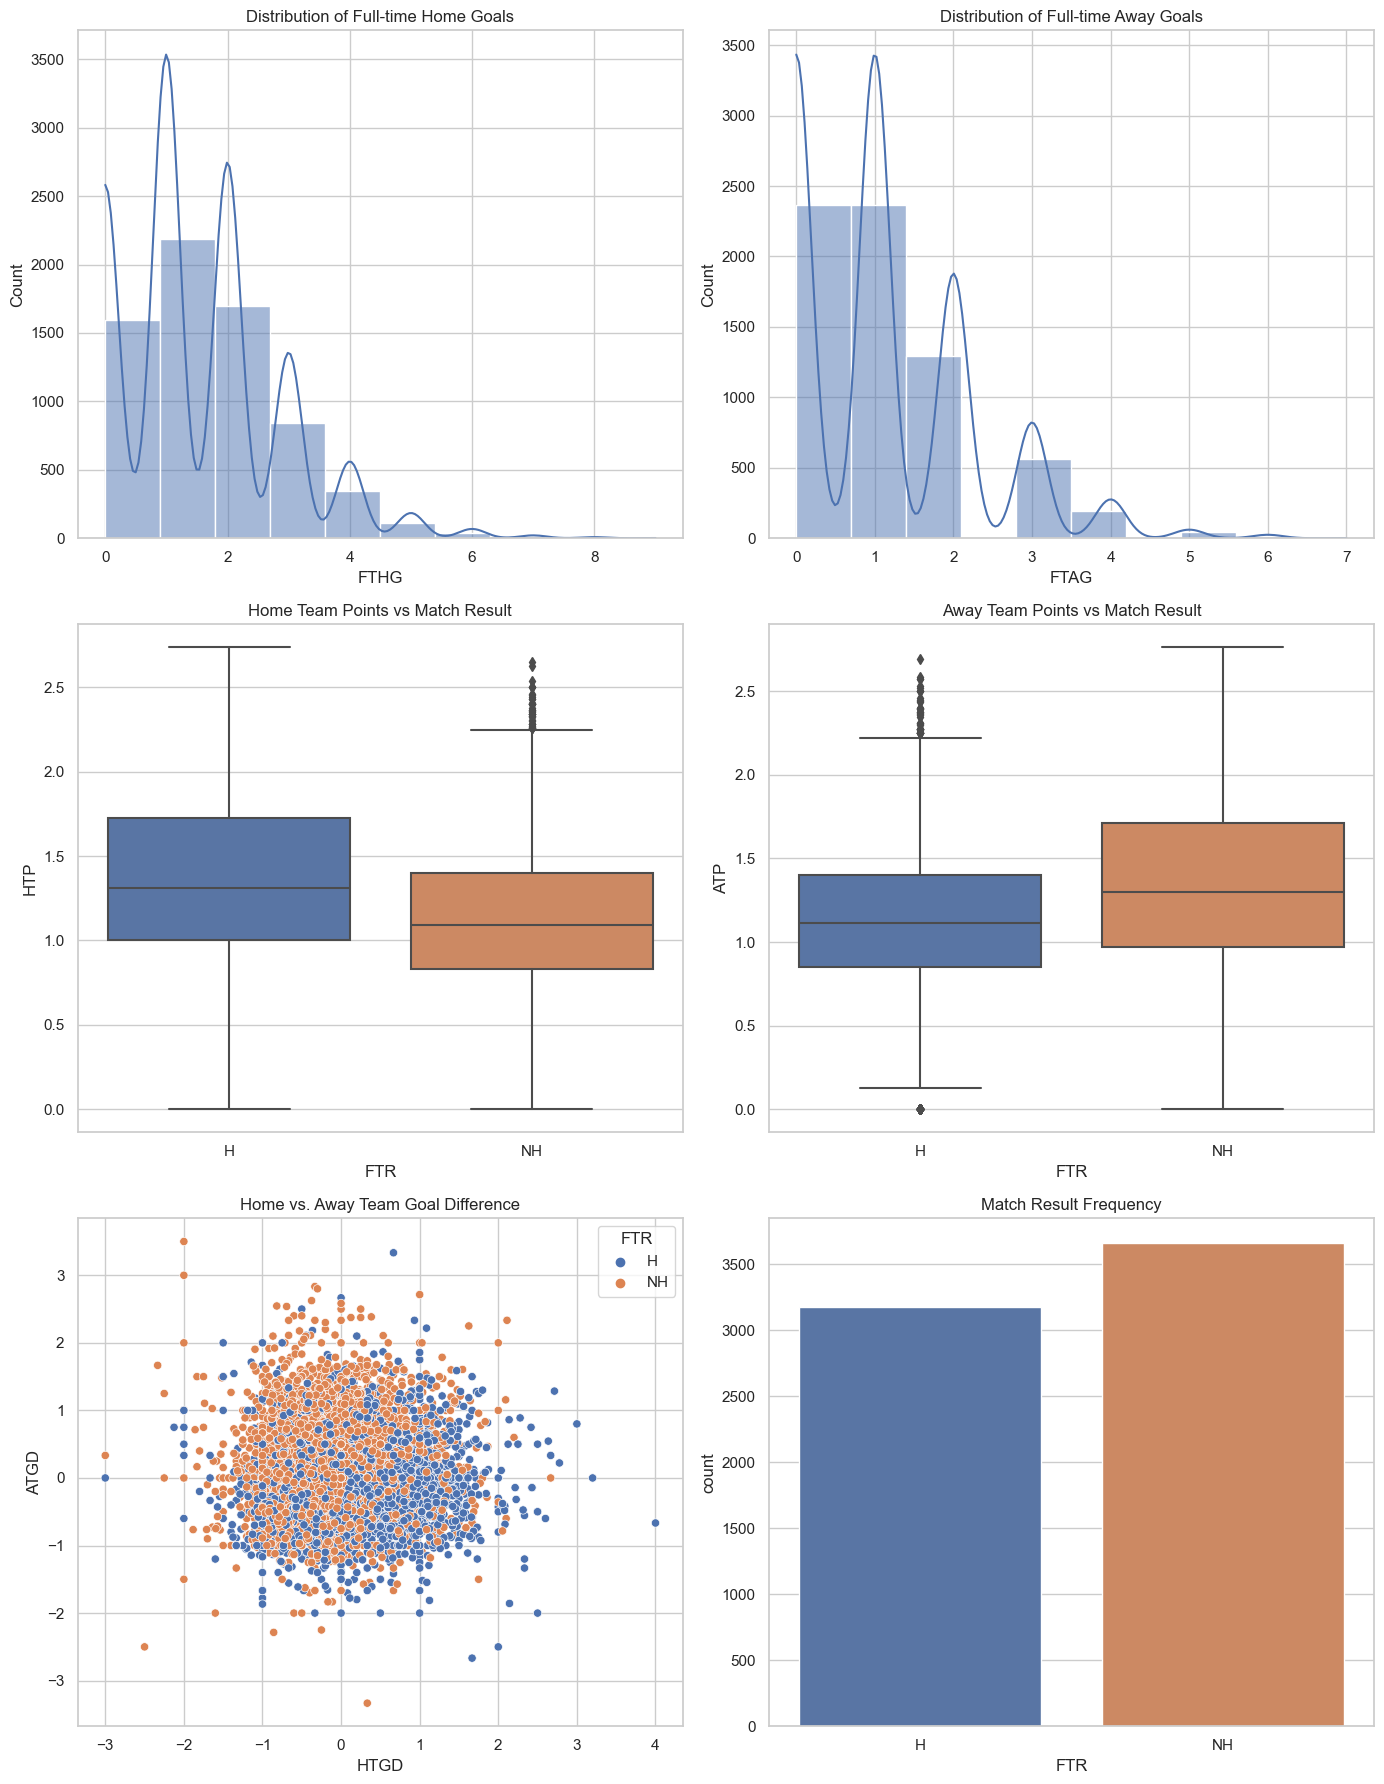

In [876]:
# Setting up visualization parameters: 
sns.set(style="whitegrid")
# Prepare a figure for multiple plots: 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
# Plotting distributions and relationships
sns.histplot(data=new_data_set, x='FTHG', bins=10, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Full-time Home Goals')

sns.histplot(data=new_data_set, x='FTAG', bins=10, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Full-time Away Goals')

sns.boxplot(x='FTR', y='HTP', data=new_data_set, ax=axes[1, 0])
axes[1, 0].set_title('Home Team Points vs Match Result')

sns.boxplot(x='FTR', y='ATP', data=new_data_set, ax=axes[1, 1])
axes[1, 1].set_title('Away Team Points vs Match Result')

sns.scatterplot(x='HTGD', y='ATGD', hue='FTR', data=new_data_set, ax=axes[2, 0])
axes[2, 0].set_title('Home vs. Away Team Goal Difference')

sns.countplot(x='FTR', data=new_data_set, ax=axes[2, 1])
axes[2, 1].set_title('Match Result Frequency')

plt.tight_layout()
plt.show()



In [877]:
# Feature engineering: Creating interaction features 
new_data_set['H_vs_A_Goal_Scored_Diff'] = new_data_set['HTGS'] - new_data_set['ATGS']
new_data_set['H_vs_A_Goal_Conceded_Diff'] = new_data_set['HTGC'] - new_data_set['ATGC']
new_data_set['Points_Ratio'] = new_data_set['HTP'] / (new_data_set['ATP'] + 0.01)  # Adding a small constant to avoid division by zero

In [878]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
    # Encode the 'FTR' column where:
# 'A' (Away win) is encoded as 0, 'D' (Draw) as 1, 'H' (Home win) as 2
new_data_set['FTR_encoded'] = label_encoder.fit_transform(new_data_set['FTR'])
# Display the first few rows to verify the encoding
new_data_set[['FTR', 'FTR_encoded']].head()


,FTR,FTR_encoded
0,H,0
1,H,0
2,NH,1
3,NH,1
4,H,0


In [879]:
# Normalization: Scaling goal differences and total goals
scaler = MinMaxScaler()
new_data_set[['HTGD', 'ATGD', 'H_vs_A_Goal_Scored_Diff', 'H_vs_A_Goal_Conceded_Diff']] = scaler.fit_transform(
   new_data_set[['HTGD', 'ATGD', 'H_vs_A_Goal_Scored_Diff', 'H_vs_A_Goal_Conceded_Diff']])

In [880]:
# Verifing the newly added Features 
new_data_set[['HTGD', 'ATGD', 'H_vs_A_Goal_Scored_Diff', 'H_vs_A_Goal_Conceded_Diff', 'Points_Ratio']].head()

,HTGD,ATGD,H_vs_A_Goal_Scored_Diff,H_vs_A_Goal_Conceded_Diff,Points_Ratio
0,0.428571,0.487805,0.475524,0.5,0.0
1,0.428571,0.487805,0.475524,0.5,0.0
2,0.428571,0.487805,0.475524,0.5,0.0
3,0.428571,0.487805,0.475524,0.5,0.0
4,0.428571,0.487805,0.475524,0.5,0.0


In [881]:
print(new_data_set.columns)

Index(['Unnamed: 0', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR',
       'HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HM1', 'HM2', 'HM3',
       'HM4', 'HM5', 'AM1', 'AM2', 'AM3', 'AM4', 'AM5', 'MW', 'HTFormPtsStr',
       'ATFormPtsStr', 'HTFormPts', 'ATFormPts', 'HTWinStreak3',
       'HTWinStreak5', 'HTLossStreak3', 'HTLossStreak5', 'ATWinStreak3',
       'ATWinStreak5', 'ATLossStreak3', 'ATLossStreak5', 'HTGD', 'ATGD',
       'DiffPts', 'DiffFormPts', 'H_vs_A_Goal_Scored_Diff',
       'H_vs_A_Goal_Conceded_Diff', 'Points_Ratio', 'FTR_encoded'],
      dtype='object')


In [882]:
# Preparing features and target variable
features = ['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts',
            'HTFormPts', 'ATFormPts', 'H_vs_A_Goal_Scored_Diff', 'H_vs_A_Goal_Conceded_Diff', 'Points_Ratio']
X = new_data_set[features]
y = new_data_set['FTR_encoded']

In [883]:
# Splitting the data into training and testing sets: 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [884]:
# Initialize the models: 
logistic_model = LogisticRegression(max_iter=1000)
random_forest_model = RandomForestClassifier(n_estimators=100)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=100)

In [885]:
# Dictionary to Hold models and their performances 
model_performance = {}

def train_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')
    f1 = f1_score(y_train, y_pred, average='weighted')
    
    # Storing performance metrics
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Train and evaluate each model
train_evaluate_model(logistic_model, "Logistic Regression")
train_evaluate_model(random_forest_model, "Random Forest")
train_evaluate_model(gradient_boosting_model, "Gradient Boosting")

model_performance

{'Logistic Regression': {'Accuracy': 0.6330409356725146,
  'Precision': 0.631969949757029,
  'Recall': 0.6330409356725146,
  'F1 Score': 0.629304728990839},
 'Random Forest': {'Accuracy': 0.9853801169590644,
  'Precision': 0.9856919198866673,
  'Recall': 0.9853801169590644,
  'F1 Score': 0.9853638306743904},
 'Gradient Boosting': {'Accuracy': 0.6838450292397661,
  'Precision': 0.6861008309933889,
  'Recall': 0.6838450292397661,
  'F1 Score': 0.6789686243704433}}

In [886]:
def test_evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Storing performance metrics
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Train and evaluate each model
test_evaluate_model(logistic_model, "Logistic Regression")
test_evaluate_model(random_forest_model, "Random Forest")
test_evaluate_model(gradient_boosting_model, "Gradient Boosting")

model_performance

{'Logistic Regression': {'Accuracy': 0.6323099415204678,
  'Precision': 0.6309450468134912,
  'Recall': 0.6323099415204678,
  'F1 Score': 0.6292712898280818},
 'Random Forest': {'Accuracy': 0.6125730994152047,
  'Precision': 0.610912084433812,
  'Recall': 0.6125730994152047,
  'F1 Score': 0.6105581195224229},
 'Gradient Boosting': {'Accuracy': 0.6396198830409356,
  'Precision': 0.639045786422932,
  'Recall': 0.6396198830409356,
  'F1 Score': 0.6348697582992998}}

In [ ]:
# Gradient Boosting was the model the performed better, so we went ahead and started the Hyperparameter tuning to improve the model performance 
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Gradient Boosting
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',  # focusing on accuracy as the metric for simplicity
                           cv=3,  # using 3-fold cross-validation
                           verbose=1,  # printing out progress
                           n_jobs=-1)  # using all available CPUs

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [ ]:
# Re-training the Gradient Boosting model with the optimized parameters
optimized_gb_model = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)

# Fit the model to the training data
optimized_gb_model.fit(X_train, y_train)

# Predict on the training data
y_train_pred_optimized = optimized_gb_model.predict(X_train)

# Calculate the accuracy on the testing data
optimized_training_accuracy = accuracy_score(y_train, y_train_pred_optimized)

optimized_training_accuracy, 

In [ ]:
# Re-Testing the Gradient Boosting Model with the optimized parameters 
optimized_gb_model_test = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.05,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=2,
    random_state=42
)
# Fit the model to the test data 
optimized_gb_model_test.fit(X_test, y_test)
# Predicting on the testing data 
y_test_pred_optimized = optimized_gb_model_test.predict(X_test)

# Calculating the accuracy: 
optimized_testing_accuracy = accuracy_score(y_test, y_test_pred_optimized)

# Calculate Precision
optimized_precision = precision_score(y_test, y_test_pred_optimized)

# Calculate Recall
optimized_recall = recall_score(y_test, y_test_pred_optimized)

# Calculate F1 Score
optimized_f1 = f1_score(y_test, y_test_pred_optimized)


print("Accuracy: ",optimized_testing_accuracy)

print("Precision:", optimized_precision)
print("Recall:", optimized_recall)
print("F1 Score:", optimized_f1)


In [ ]:
# Assuming 'optimized_gb_model' is your trained Gradient Boosting model and 'X' is your feature matrix
feature_importances = optimized_gb_model.feature_importances_

# Creating a DataFrame to hold the feature names and their corresponding importance
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sorting the DataFrame by the 'Importance' column in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=features_df)
plt.title('Feature Importance in Optimized Gradient Boosting Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Print the DataFrame to view it in tabular form
print(features_df)


In [ ]:
'''    DiffPts: Likely represents the difference in points between the two teams. Points could be the total accumulated over the season or a set of games.
    H_vs_A_Goal_Scored_Diff: Home vs Away Goal Scored Diff
    ATP:  "Away Team Points," 
    HTGD: "Home Team Goal Difference" 
    ATGD: "Away Team Goal Difference" 
    Points_Ratio: Likely the ratio of points between the home and away teams, providing a relative measure of their strengths.
    HTP: "Home Team Points" 
    H_vs_A_Goal_Conceded_Diff: 
    DiffFormPts: Likely represents the difference in form points between the two teams, which could be based on recent performances.
    ATFormPts: "Away Team Form Points"
    ATGC: "Away Team Goals Conceded" 
    HTGS: "Home Team Goals Scored"
    HTGC: "Home Team Goals Conceded" 
    HTFormPts: "Home Team Form Points"
    ATGS: "Away Team Goals Scored" 
    '''

In [ ]:
# Validation: 
# Using 5-fold cross-validation to validate the optimized Gradient Boosting model
cv_scores = cross_val_score(optimized_gb_model, X, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Gives you an average score across all fold providing an insight into how generally well the model performs
print("Cross-Validation Mean Accuracy: {:.2f}%".format(cv_mean * 100))
# Indicates the varaibility of the model's performance, giving you an idea about its stabiliy across different subsets 
print("Cross-Validation Standard Deviation: {:.2f}%".format(cv_std * 100))

In [ ]:
from sklearn.model_selection import learning_curve

# Define function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Generate the learning curve for the optimized Gradient Boosting model
cv = 5  # 5-fold cross-validation
plot_learning_curve(optimized_gb_model, 'Learning Curve for Gradient Boosting', X, y, cv=cv, n_jobs=-1)


In [ ]:
def plot_roc_curve(model, X_test, y_test):
    # Predict probabilities for the positive class
    probs = model.predict_proba(X_test)[:, 1]
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # Calculate AUC score
    auc = roc_auc_score(y_test, probs)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

# Example of plotting ROC curve for the Gradient Boosting model
plot_roc_curve(optimized_gb_model, X_test, y_test)

In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Example of plotting Confusion Matrix for the Gradient Boosting model
plot_confusion_matrix(optimized_gb_model, X_test, y_test)

In [ ]:
'''
Label 0 represent Home loss or Not Win 
Label 1 represent Home Win 

Top Left True Negative 328: Represent correct precitions for the negative class. 
Top-Right False Positive 306: This represents the error where the model incorecctly predicted the positve class. 
Bottom-Left False Negative 180: This represents the error where the model incorrectly predicted the negative class 
Bottom Right: True positive 554: This represent the correct predictions for the positive class.
'''

In [ ]:
# Preparing features and encoding the target 'FTR'
from sklearn.preprocessing import LabelEncoder

# Encoding the target
label_encoder = LabelEncoder()
new_data_set['FTR_encoded'] = label_encoder.fit_transform(new_data_set['FTR'])

# Selecting a subset of features for simplicity
features = ['HTGS', 'ATGS', 'HTGC', 'ATGC', 'HTP', 'ATP', 'HTGD', 'ATGD', 'DiffPts', 'DiffFormPts']
X = new_data_set[features]
y = new_data_set['FTR_encoded']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-initialize and train the Random Forest and Gradient Boosting models
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting_model = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth=3, 
                                                     min_samples_split=2, min_samples_leaf=2, random_state=42)

# Train the models
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_rf = random_forest_model.predict(X_test)
y_pred_gb = gradient_boosting_model.predict(X_test)

# Mapping predictions back to readable format
y_pred_rf_mapped = label_encoder.inverse_transform(y_pred_rf)
y_pred_gb_mapped = label_encoder.inverse_transform(y_pred_gb)

# Extracting actual team names and results from the test set
test_team_info = new_data_set.loc[X_test.index, ['HomeTeam', 'AwayTeam', 'FTR']]

# Creating the final DataFrame
final_predictions_with_actual_names = pd.DataFrame({
    'HomeTeam': test_team_info['HomeTeam'],
    'AwayTeam': test_team_info['AwayTeam'],
    'Actual Result': test_team_info['FTR'],
    'RF Prediction': y_pred_rf_mapped,
    'GB Prediction': y_pred_gb_mapped
})

final_predictions_with_actual_names


In [ ]:
'''
H = Home win
NH = Not Home Win 
'''